In [27]:
from wy_baseline import wy_tradegy, selc_func
from matplotlib import pyplot as plt

## import data

In [29]:
data = pd.read_csv('../analysis/result.csv')

In [30]:
open = list(data['open'])
open_truth = list(data['open_truth'])
close = list(data['close'])
close_truth = list(data['close_truth'])
high = list(data['high'])
high_truth = list(data['high_truth'])
low = list(data['low'])
low_truth = list(data['low_truth'])

## check error of prediction

open 1.375774529749094 1.4852937373678752
close 1.7907270564110211 1.4652715938034684
high 0.916351102234908 1.4329739030615973
low 2.0918006952858805 1.5225873142867041


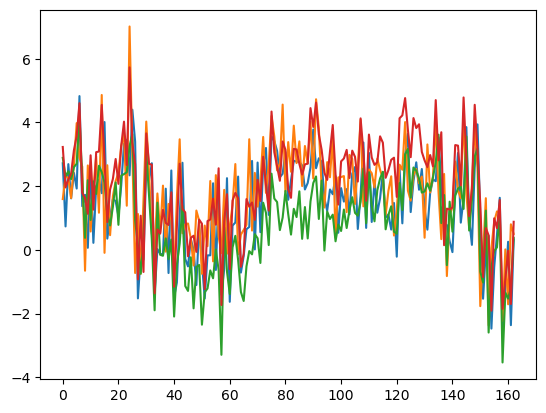

In [31]:
for i in ['open', 'close', 'high', 'low']:
    error = (data[i]-data[i+'_truth'])/data[i+'_truth']*100
    print(i, error.mean(), error.std())
    plt.plot(error)

## trading

In [32]:
rk = 1.0
for i in range(len(open)):
    amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
    rk *=amptl

print(rk)

0.9121409843526869


## set different water to check the results

In [33]:
def set(x):
    rk = 1.0
    #print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
    for i in range(len(open)):
        amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], x)
        #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
        
        rk *=amptl

    return rk

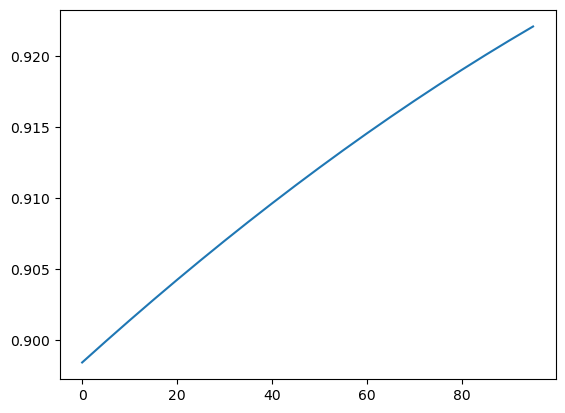

In [34]:
plt.plot(range(0,100,5), [set(x/100) for x in range(0,100,5)])